# 4.9 Intro to Data Visualization in Python


### Tasks within the lesson
#### For Task Part 2 starts from line 180

In [32]:
## Importing required packages

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [33]:
## Importing the required dataset

path = r'/Users/balachandark/Desktop/Instacart Basket Analysis'

ords_prods_customer = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ords_prods_customer.pkl'))

<Axes: xlabel='orders_day_of_week'>

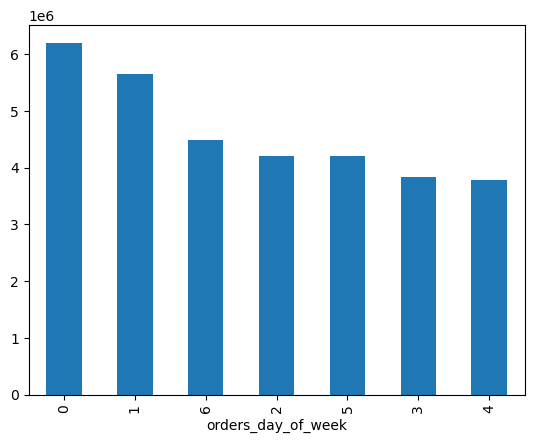

In [34]:
## Creating bar chart

ords_prods_customer['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

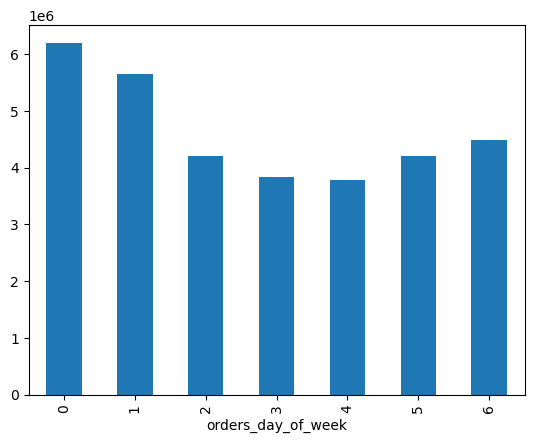

In [35]:
## Sorting the axis

ords_prods_customer['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_week'>

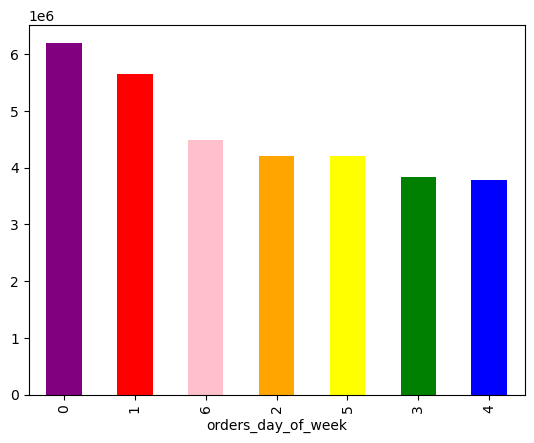

In [36]:
## Adding color

ords_prods_customer['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

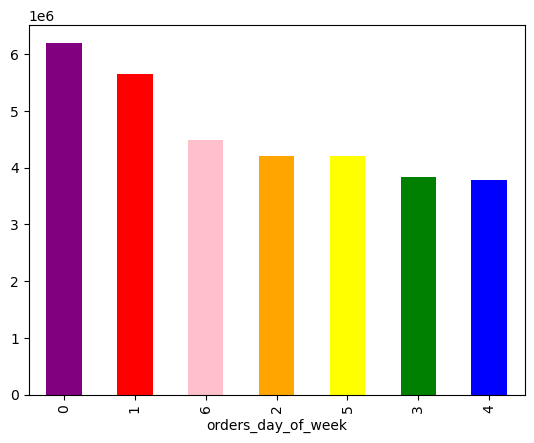

In [37]:
## Exporting charts

bar = ords_prods_customer['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))


<Axes: ylabel='Frequency'>

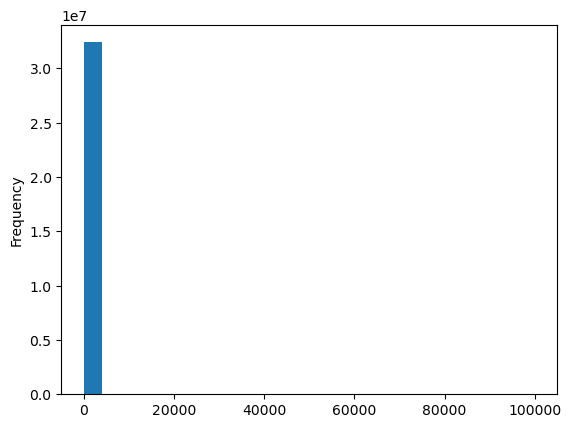

In [38]:
## Histograms

ords_prods_customer['prices'].plot.hist(bins = 25)

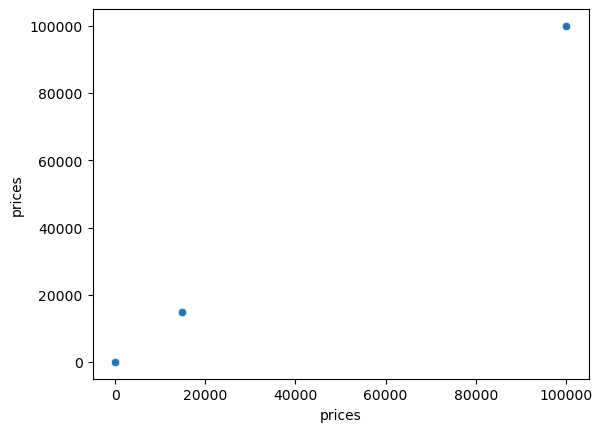

In [39]:
## Scatter plot

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_customer)
plt.show()

In [40]:
## Examining the dataset and declaring odd values as missing values

ords_prods_customer['prices'].max()


99999.0

In [41]:
## Declaring values more than 100$ as missing values

ords_prods_customer.loc[ords_prods_customer['prices'] >100, 'prices'] = np.nan
ords_prods_customer['prices'].max()


25.0

<Axes: ylabel='Frequency'>

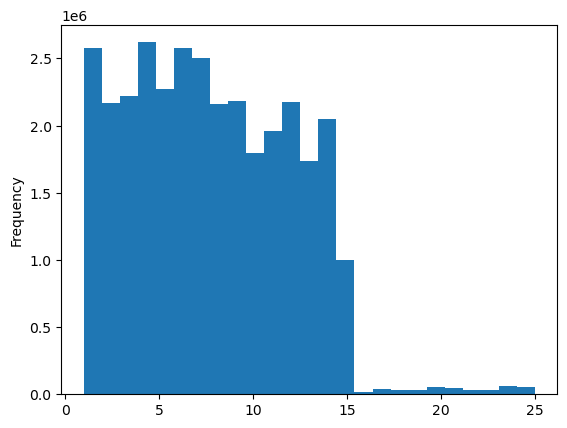

In [42]:
## Producing the histogram after data cleaning

ords_prods_customer['prices'].plot.hist(bins = 25)

In [43]:
## Line charts
## Sampling the data frame

df = ords_prods_customer[:2000000]

In [44]:
## Setting seed and sampling data

np.random.seed(4)
dev = np.random.rand(len(ords_prods_customer)) <= 0.7

In [45]:
## Splitting the data frame

## 70% of the data frame
big = ords_prods_customer[dev]

## 30% of the data frame
small = ords_prods_customer[~dev]

In [46]:
## Assessing the size of the data frames

len(ords_prods_customer)

32404859

In [47]:
## Validating

len(small) + len(big)

32404859

In [48]:
## Selecting only the columns of interest

df_2 = small[['orders_day_of_week','prices']]

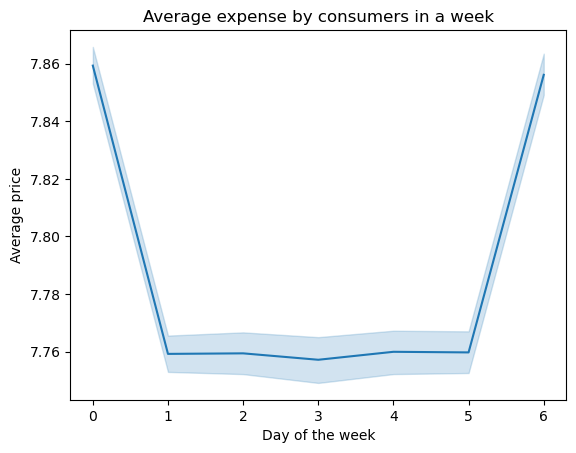

In [91]:
## Producing line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')
plt.xlabel("Day of the week")
plt.ylabel("Average price")
plt.title("Average expense by consumers in a week")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_expense_week_day.png'))

### Exercise tasks - Part 2

#### Q3: Create a histogram for order hour of day

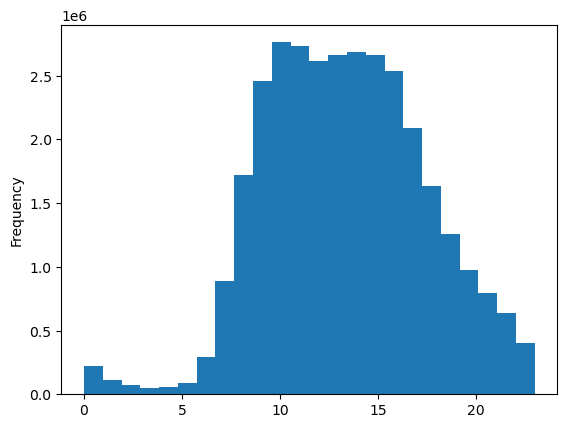

In [52]:
### Histogram

ords_prods_customer['order_hour_of_day'].plot.hist(bins = 24)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hour_of_day.png'))

##### I chose bin size of 24 so that we get one bin for each hour in a day. Looking at the histogram, we can say that the people place more orders around mid part of the day - between 10 am to 4 pm. There are very limited orders placed in early morning hours. In the late evening, the number of orders go down. 

#### Q4: Distribution of loyalty customer groups

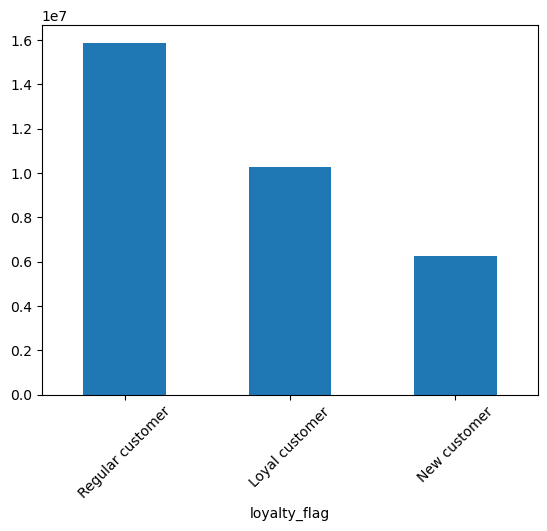

In [100]:
ords_prods_customer['loyalty_flag'].value_counts().plot.bar()
plt.xticks(rotation = 45)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_plot_loyalty.png'), bbox_inches='tight')

##### We have more regular customers than loyal customers. 

#### Q5: Identify the differences in expenditure based on the hour of the day using line chart


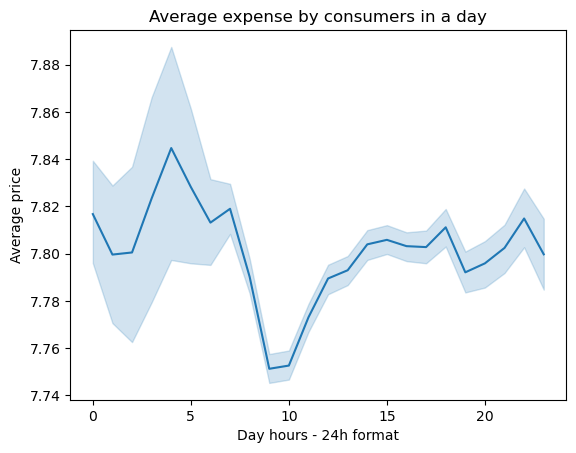

In [96]:
## Line chart using 70% of the data frame

np.random.seed(4)
dev = np.random.rand(len(ords_prods_customer)) <= 0.7
big_df = ords_prods_customer[dev]

line = sns.lineplot(data = big_df, x = 'order_hour_of_day',y = 'prices')
plt.xlabel("Day hours - 24h format")
plt.ylabel("Average price")
plt.title("Average expense by consumers in a day")


plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_expenditure_hour.png'))

#### Q6: Relationship between age and family situation

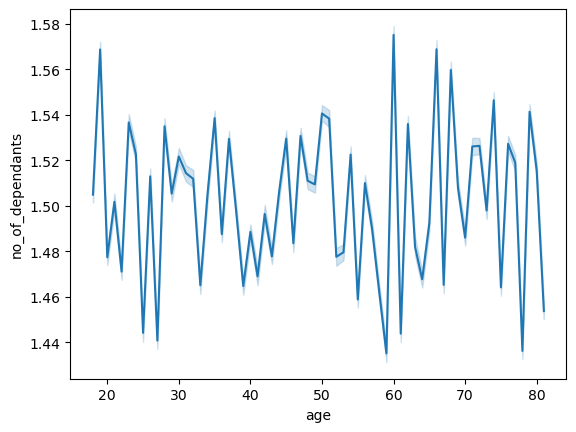

In [60]:
line = sns.lineplot(data = big_df, x = 'age',y = 'no_of_dependants')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_age_dependents.png'))

##### The line chart shows that there is no clear relationship between age and the number of dependents (family situations)

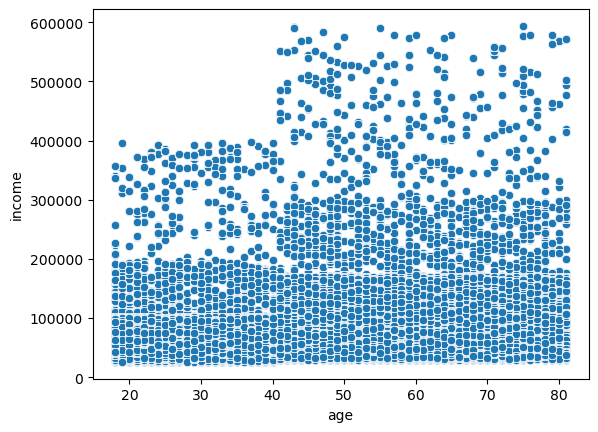

In [62]:
sns.scatterplot(data = big_df, x = 'age', y = 'income')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

##### There is no clear relationship between age and income. Ideally, we need to use sns.regplot to find the relationship between the variabels.

<center><b> End of report </b></center>